In [793]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
import pylab

%matplotlib inline

In [815]:
df=pd.read_excel('D:\Стас\Ученье - Свет\Оценка\Аспирантура\Видео по NN, Data mining, ABC и т.д\Распределение Гаусса, регрессия\Python\!Наработки\Квартиры Киров/Квартиры_Киров_выбока.xlsx', sheet_name = 0)
df.head()

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,Хронологический возраст,Адрес,Долгота,Широта,pca(координата),Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,54,"Кировская область, Киров, ул. Некрасова, 53",49.628919,58.583420,0.011685,2850000,14.862830,63758.389262,стандарт,1
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,63,"Кировская область, Киров, Октябрьский пр-т, 8",49.616819,58.638089,0.029066,2100000,14.557448,65625.000000,стандарт,1
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,9,"Кировская область, Киров, село Макарье, Проезж...",49.751737,58.612207,-0.107734,2950000,14.897316,88855.421687,стандарт,1
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,46,"Кировская область, Киров, ул. Карла Маркса, 47",49.667376,58.606375,-0.024346,4450000,15.308415,86240.310078,стандарт,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,2,"Кировская область, Киров, ул. Ивана Попова, 38",49.631758,58.575974,0.008132,5380000,15.498199,98715.596330,стандарт,1


In [816]:
df_1 = df.copy()

In [817]:
df_1.columns

Index(['Комнатность', 'LN(Общая площадь)', 'Общая площадь', 'Площадь кухни',
       'Жилая площадь', 'Этаж 1', 'Этаж 2', 'Этажей в доме', 'Ремонт',
       'Материал стен', 'Хронологический возраст', 'Адрес', 'Долгота',
       'Широта', 'pca(координата)', 'Цена', 'LN(Цена)', 'Цена(кв.м)',
       'Класс качества', 'Тип санузла 2'],
      dtype='object')

In [ ]:
# Удаляем лишние столбцы
#df_1=df_1.drop(['Ссылка', 'Способ продажи'], axis=1)
#df_1

In [818]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Комнатность']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2,0,1,2,3,4
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,2850000,14.862830,63758.389262,стандарт,1,0.0,1.0,0.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,2100000,14.557448,65625.000000,стандарт,1,1.0,0.0,0.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,2950000,14.897316,88855.421687,стандарт,1,0.0,0.0,0.0,0.0,1.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,4450000,15.308415,86240.310078,стандарт,0,0.0,1.0,0.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,5380000,15.498199,98715.596330,стандарт,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,2144500,14.578417,84098.039216,стандарт,1,0.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,4078350,15.221203,79500.000000,стандарт,1,0.0,1.0,0.0,0.0,0.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,3664020,15.114071,78965.948276,стандарт,1,0.0,1.0,0.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,2150000,14.580978,48863.636364,стандарт,1,0.0,1.0,0.0,0.0,0.0


In [819]:
# переименнуе столбцы
df_1 = df_1.rename({0: '1к', 1: '2к', 2: '3к', 3: '4к и более', 4: 'студия'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Цена,LN(Цена),Цена(кв.м),Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,2850000,14.862830,63758.389262,стандарт,1,0.0,1.0,0.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,2100000,14.557448,65625.000000,стандарт,1,1.0,0.0,0.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,2950000,14.897316,88855.421687,стандарт,1,0.0,0.0,0.0,0.0,1.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,4450000,15.308415,86240.310078,стандарт,0,0.0,1.0,0.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,5380000,15.498199,98715.596330,стандарт,1,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,2144500,14.578417,84098.039216,стандарт,1,0.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,4078350,15.221203,79500.000000,стандарт,1,0.0,1.0,0.0,0.0,0.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,3664020,15.114071,78965.948276,стандарт,1,0.0,1.0,0.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,2150000,14.580978,48863.636364,стандарт,1,0.0,1.0,0.0,0.0,0.0


In [820]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Этаж 2']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия,0,1,2
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,стандарт,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,стандарт,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,стандарт,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [821]:
# переименнуе столбцы
df_1 = df_1.rename({0: 'первый', 1: 'последний', 2: 'средний'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,Класс качества,Тип санузла 2,1к,2к,3к,4к и более,студия,первый,последний,средний
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,стандарт,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,стандарт,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,стандарт,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,стандарт,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,стандарт,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [822]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Материал стен']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,3к,4к и более,студия,первый,последний,средний,0,1,2,3
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [823]:
# переименнуе столбцы
df_1 = df_1.rename({0: 'деревянный', 1: 'кирпичный', 2: 'монолитный', 3: 'панельный'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,3к,4к и более,студия,первый,последний,средний,деревянный,кирпичный,монолитный,панельный
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [824]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(df_1[['Ремонт']]).toarray())

df_1 = df_1.join(enc_df)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,0,1,2,3
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [825]:
df_1 = df_1.rename({0: 'дизайнерский', 1: 'евро', 2: 'косметический', 3: 'требует ремонта'}, axis='columns')
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,последний,средний,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена'>

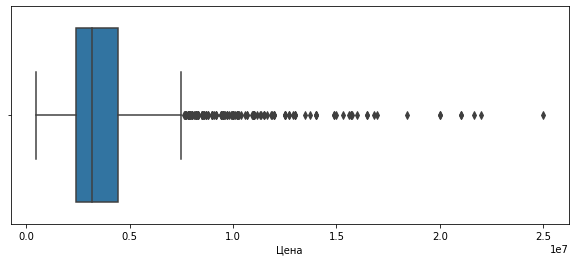

In [826]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['Цена'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Цена)'>

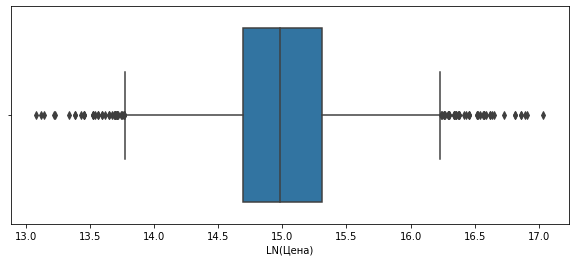

In [827]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['LN(Цена)'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Общая площадь'>

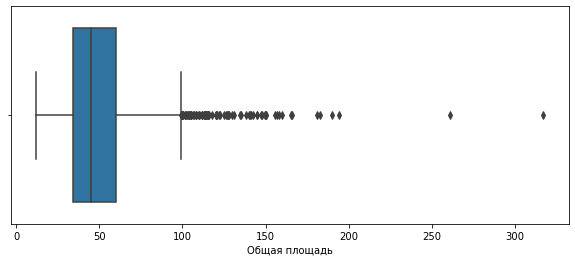

In [828]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['Общая площадь'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Общая площадь)'>

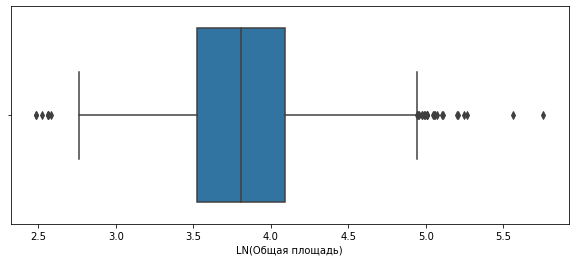

In [829]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_1['LN(Общая площадь)'])

In [830]:
df_1.columns

Index(['Комнатность', 'LN(Общая площадь)', 'Общая площадь', 'Площадь кухни',
       'Жилая площадь', 'Этаж 1', 'Этаж 2', 'Этажей в доме', 'Ремонт',
       'Материал стен', 'Хронологический возраст', 'Адрес', 'Долгота',
       'Широта', 'pca(координата)', 'Цена', 'LN(Цена)', 'Цена(кв.м)',
       'Класс качества', 'Тип санузла 2', '1к', '2к', '3к', '4к и более',
       'студия', 'первый', 'последний', 'средний', 'деревянный', 'кирпичный',
       'монолитный', 'панельный', 'дизайнерский', 'евро', 'косметический',
       'требует ремонта'],
      dtype='object')

In [831]:
df_v1 = df_1.loc[df_1['Общая площадь'] < 90]

In [832]:
df_v1 = df_v1.loc[df_1['Хронологический возраст'] < 100]

In [833]:
df_v1 = df_v1.loc[df_v1['Цена'] < 6000000]
len(df_v1)

2081

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Цена'>

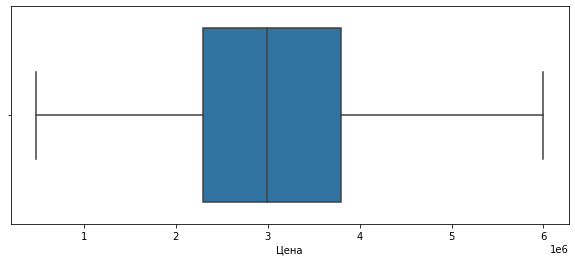

In [834]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v1['Цена'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Общая площадь'>

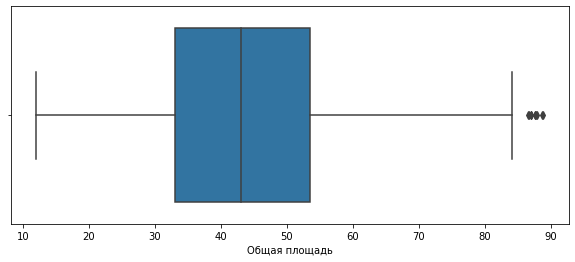

In [835]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v1['Общая площадь'])

In [836]:
df_v2 = df_1.loc[(df_1['LN(Общая площадь)'] > 2.75) & (df_1['LN(Общая площадь)'] < 4.9)]

In [839]:
df_v2 = df_v2.loc[df_v2['Хронологический возраст'] < 100]

In [840]:
df_v2 = df_v2.loc[(df_v2['LN(Цена)'] > 13.8) & (df_v2['LN(Цена)'] < 16.1)]

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Общая площадь)'>

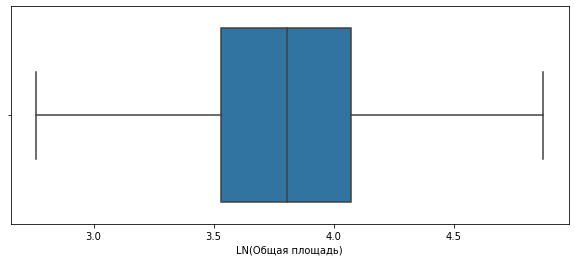

In [841]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['LN(Общая площадь)'])

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LN(Цена)'>

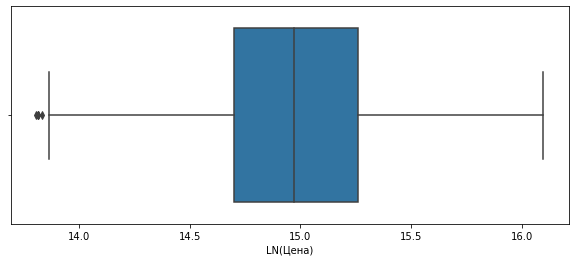

In [842]:
# Построим диаграмму ящик с усами
plt.figure(figsize=(10,4))
sns.boxplot(df_v2['LN(Цена)'])

In [843]:
len(df_v2)

2264

<font size = 3><div style="text-align: justify">**Вариант 1:**</div></font>

In [471]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['Общая площадь', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
           '1к', '2к', '3к', '4к и более','первый', 'последний', 'деревянный', 'панельный', 
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный' и 'кирпичный' уравниваются, 'дизайнерский', 'LN(Общая площадь)'

Y = df_v1['Цена']
#Y = df_1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:                   Цена   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     317.4
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:15:47   Log-Likelihood:                -24450.
No. Observations:                1667   AIC:                         4.893e+04
Df Residuals:                    1650   BIC:                         4.903e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


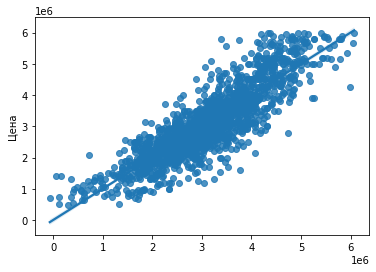

In [472]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 2:**</div></font>

In [473]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '4к и более',
          'первый', 'последний', 'деревянный', 'панельный', 'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v1['Цена']
Y = df_v1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     369.5
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:15:56   Log-Likelihood:                 304.59
No. Observations:                1667   AIC:                            -579.2
Df Residuals:                    1652   BIC:                            -497.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


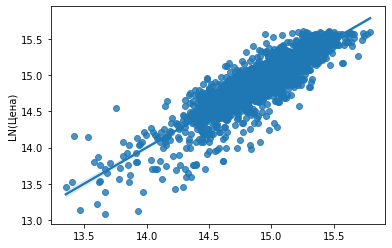

In [474]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 3:**</div></font>

In [475]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['Общая площадь', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 
          'первый', 'последний', 'деревянный', 'панельный', 'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     451.9
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:16:10   Log-Likelihood:                 351.60
No. Observations:                1814   AIC:                            -671.2
Df Residuals:                    1798   BIC:                            -583.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


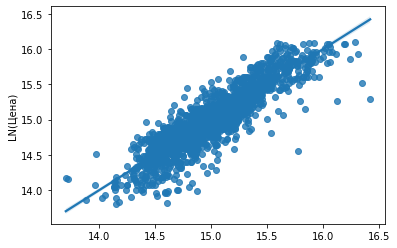

In [476]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 4:**</div></font>

In [477]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     462.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:16:25   Log-Likelihood:                 416.03
No. Observations:                1814   AIC:                            -798.1
Df Residuals:                    1797   BIC:                            -704.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


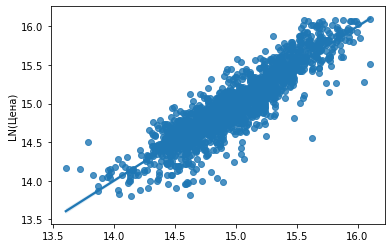

In [478]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<AxesSubplot:>

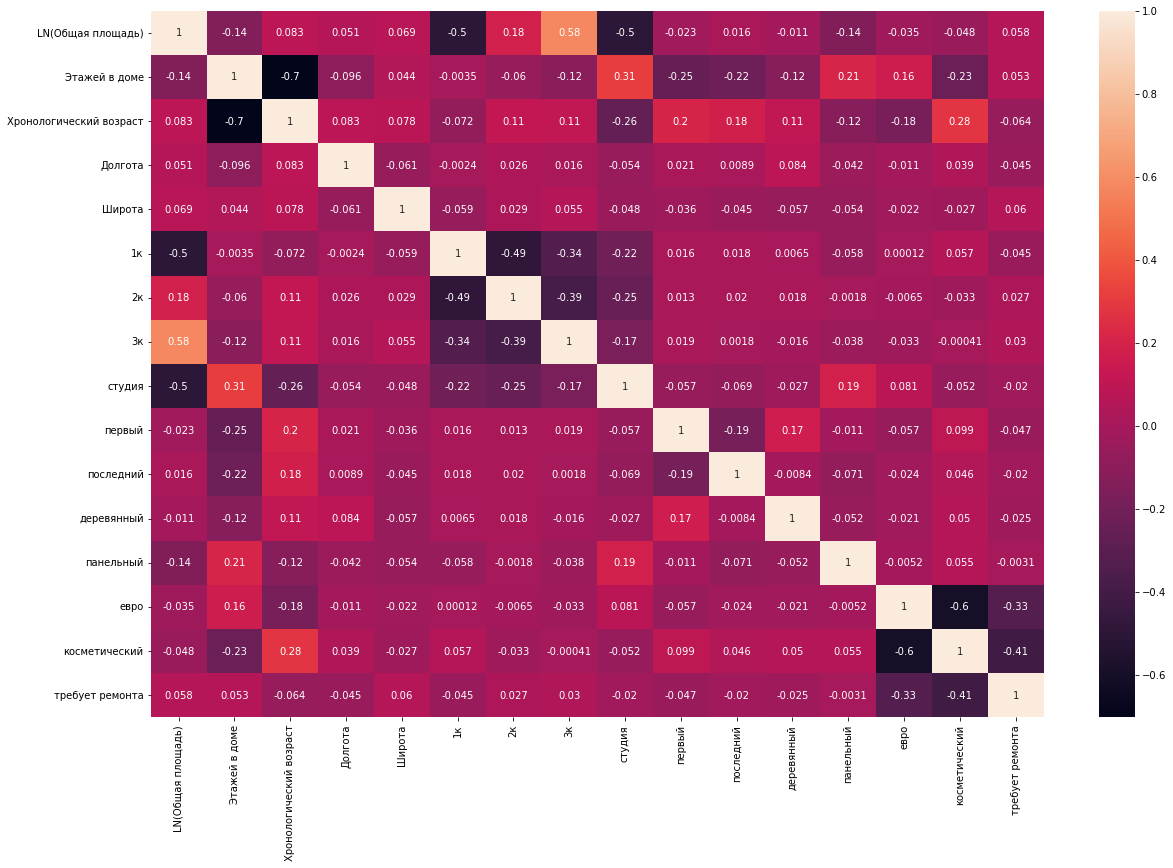

In [479]:
# Строим корреляционную матрицу
numeric_col = ['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']
corr_matrix = df_v2.loc[:,numeric_col].corr(method="pearson") # pearson, kendall, spearman
plt.figure(figsize = (20,13))
sns.heatmap(corr_matrix, annot=True)

<font size = 3><div style="text-align: justify">**Вариант 5:**</div></font>

In [480]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     604.4
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:18:00   Log-Likelihood:                 399.23
No. Observations:                1814   AIC:                            -772.5
Df Residuals:                    1801   BIC:                            -700.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


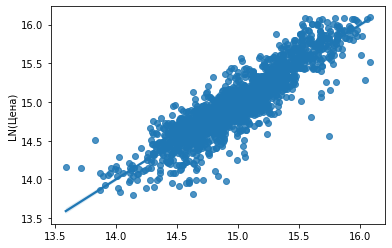

In [481]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 6:**</div></font>

In [482]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
           '1к', '2к', '3к', '4к и более','первый', 'последний', 'деревянный', 'панельный', 
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный' и 'кирпичный' уравниваются, 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v1['Цена']
#Y = df_1['LN(Цена)']
Y = df_v1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:             Цена(кв.м)   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     150.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):          1.73e-308
Time:                        09:18:16   Log-Likelihood:                -18137.
No. Observations:                1667   AIC:                         3.631e+04
Df Residuals:                    1650   BIC:                         3.640e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


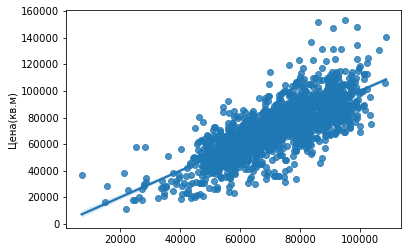

In [483]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

In [ ]:
# df_v1 и df_v2

<font size = 3><div style="text-align: justify">**Преобразование данных (MinMaxScaler):**</div></font>

In [484]:
from sklearn.preprocessing import MinMaxScaler

In [499]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [500]:
mms_1 = MinMaxScaler()
mms_1.fit(X_train)

MinMaxScaler()

In [501]:
X_train_norm = pd.DataFrame(mms_1.transform(X_train), columns = X_train.columns)
X_train_norm

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,0.421997,0.000000,0.455285,0.572408,0.709759,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.682655,0.346154,0.227642,0.740708,0.566289,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.668671,0.346154,0.235772,0.523193,0.628903,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.380177,0.615385,0.056911,0.600973,0.416917,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.455809,0.615385,0.056911,0.494452,0.626542,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,0.489565,0.153846,0.479675,0.681108,0.690057,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1810,0.489565,0.153846,0.463415,0.690997,0.706786,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1811,0.506638,0.615385,0.008130,0.607619,0.410501,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1812,0.415699,0.307692,0.081301,0.736515,0.525760,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [502]:
X_train_norm.describe()

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
count,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,0.501236,0.318400,0.210755,0.635623,0.571595,0.290518,0.366593,0.212238,0.099228,0.144432,0.173098,0.007166,0.290518,0.330209,0.426681,0.183021
std,0.172134,0.201275,0.172589,0.106415,0.195462,0.454127,0.482007,0.409005,0.299051,0.351624,0.378436,0.084374,0.454127,0.470418,0.494732,0.386790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.366321,0.153846,0.048780,0.578873,0.497243,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500307,0.307692,0.186992,0.640773,0.583130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.627147,0.500000,0.365854,0.714913,0.681331,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [503]:
X_test_norm = pd.DataFrame(mms_1.transform(X_test), columns = X_test.columns)
X_test_norm

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,0.423246,0.615385,0.040650,0.728998,0.529192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.714230,0.615385,0.000000,0.723794,0.492450,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.489565,0.653846,0.048780,0.539869,0.555446,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.637821,0.307692,0.252033,0.605761,0.767148,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.380177,0.615385,0.056911,0.597274,0.417015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,0.424493,0.346154,0.065041,0.718236,0.481859,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
450,0.824681,0.307692,0.252033,0.525844,0.670973,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
451,0.471859,0.346154,0.016260,0.578284,0.774450,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
452,0.393643,0.423077,0.081301,0.608570,0.688008,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [504]:
# то, что минимум не 0, а максимум не 1, это нормально
X_test_norm.describe()

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,0.492832,0.321078,0.209036,0.643045,0.579099,0.323789,0.337004,0.207048,0.099119,0.149780,0.167401,0.004405,0.279736,0.288546,0.455947,0.187225
std,0.166620,0.202240,0.175598,0.103169,0.188692,0.468437,0.473208,0.405638,0.299151,0.357249,0.373745,0.066299,0.449364,0.453586,0.498605,0.390522
min,0.072820,0.000000,0.000000,0.211045,0.000486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.373990,0.153846,0.048780,0.589421,0.502969,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.492273,0.307692,0.178862,0.645115,0.590076,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.621616,0.500000,0.365854,0.717485,0.685856,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.010709,1.000000,0.853659,0.985165,0.990819,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [505]:
Y_train = Y_train.reset_index()
Y_train = Y_train.drop('index', axis=1)
Y_train

,LN(Цена)
0,14.508658
1,15.701064
2,15.363073
3,14.753563
4,15.201805
...,...
1809,14.946913
1810,14.711599
1811,14.890513
1812,15.056779


<font size = 3><div style="text-align: justify">**Вариант 7:**</div></font>

In [496]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

Y = df_v1['Цена']
#Y = df_1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     462.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:22:13   Log-Likelihood:                 416.03
No. Observations:                1814   AIC:                            -798.1
Df Residuals:                    1797   BIC:                            -704.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


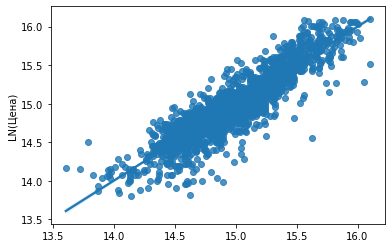

In [506]:
X = sm.add_constant(X_train_norm) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Вариант 8:**</div></font>

In [ ]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     462.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:22:39   Log-Likelihood:                 416.03
No. Observations:                1814   AIC:                            -798.1
Df Residuals:                    1797   BIC:                            -704.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


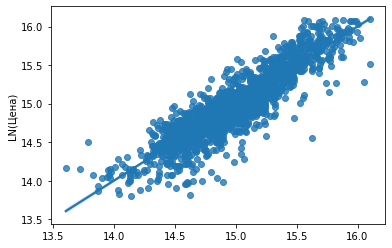

In [507]:
X = sm.add_constant(X_train_norm) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

Изменений нет! Мультиколлинеарность отсутствует! Также, об отсутствии мультиколлинеарности свидетельствует стабильность коэффициентов при независимых переменных.

<font size = 3><div style="text-align: justify">**Преобразование данных (StandardScaler):**</div></font>

In [508]:
from sklearn.preprocessing import StandardScaler

In [509]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [510]:
mms_2 = StandardScaler()
mms_2.fit(X_train)

StandardScaler()

In [511]:
X_train_std = pd.DataFrame(mms_2.transform(X_train), columns = X_train.columns)
X_train_std

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,-0.460461,-1.582352,1.417222,-0.594199,0.707057,1.562730,-0.760765,-0.519056,-0.331902,2.433858,-0.457530,-0.08496,-0.639906,-0.702143,1.159167,-0.473309
1,1.054230,0.137930,0.097876,0.987776,-0.027151,-0.639906,-0.760765,1.926574,-0.331902,-0.410870,-0.457530,-0.08496,-0.639906,-0.702143,1.159167,-0.473309
2,0.972968,0.137930,0.144995,-1.056814,0.293275,-0.639906,-0.760765,1.926574,-0.331902,-0.410870,-0.457530,-0.08496,-0.639906,-0.702143,1.159167,-0.473309
3,-0.703476,1.475928,-0.891634,-0.325697,-0.791564,-0.639906,1.314465,-0.519056,-0.331902,-0.410870,-0.457530,-0.08496,1.562730,-0.702143,-0.862688,2.112784
4,-0.263976,1.475928,-0.891634,-1.326972,0.281193,-0.639906,1.314465,-0.519056,-0.331902,-0.410870,-0.457530,-0.08496,1.562730,1.424212,-0.862688,-0.473309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,-0.067821,-0.817782,1.558581,0.427547,0.606233,-0.639906,1.314465,-0.519056,-0.331902,-0.410870,-0.457530,-0.08496,-0.639906,1.424212,-0.862688,-0.473309
1810,-0.067821,-0.817782,1.464342,0.520505,0.691843,-0.639906,1.314465,-0.519056,-0.331902,-0.410870,2.185651,-0.08496,-0.639906,-0.702143,-0.862688,2.112784
1811,0.031393,1.475928,-1.174352,-0.263228,-0.824398,-0.639906,1.314465,-0.519056,-0.331902,2.433858,-0.457530,-0.08496,1.562730,1.424212,-0.862688,-0.473309
1812,-0.497059,-0.053212,-0.750276,0.948366,-0.234559,1.562730,-0.760765,-0.519056,-0.331902,-0.410870,-0.457530,-0.08496,-0.639906,1.424212,-0.862688,-0.473309


In [512]:
X_test_std = pd.DataFrame(mms_2.transform(X_test), columns = X_test.columns)
X_test_std

,LN(Общая площадь),Этажей в доме,Хронологический возраст,Долгота,Широта,1к,2к,3к,студия,первый,последний,деревянный,панельный,евро,косметический,требует ремонта
0,-0.453199,1.475928,-0.985873,0.877701,-0.216995,1.562730,-0.760765,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,-0.639906,1.424212,-0.862688,-0.473309
1,1.237711,1.475928,-1.221471,0.828790,-0.405022,-0.639906,-0.760765,1.926574,-0.331902,-0.41087,-0.45753,-0.08496,1.562730,-0.702143,-0.862688,2.112784
2,-0.067821,1.667070,-0.938754,-0.900063,-0.082639,-0.639906,1.314465,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,-0.639906,-0.702143,1.159167,-0.473309
3,0.793699,-0.053212,0.239234,-0.280698,1.000746,-0.639906,-0.760765,1.926574,-0.331902,-0.41087,-0.45753,-0.08496,-0.639906,-0.702143,1.159167,-0.473309
4,-0.703476,1.475928,-0.891634,-0.360471,-0.791060,1.562730,-0.760765,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,1.562730,-0.702143,1.159167,-0.473309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,-0.445956,0.137930,-0.844515,0.776547,-0.459224,-0.639906,1.314465,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,-0.639906,1.424212,-0.862688,-0.473309
450,1.879547,-0.053212,0.239234,-1.031893,0.508570,-0.639906,-0.760765,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,1.562730,-0.702143,1.159167,-0.473309
451,-0.170711,0.137930,-1.127232,-0.538975,1.038110,1.562730,-0.760765,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,-0.639906,-0.702143,-0.862688,2.112784
452,-0.625225,0.520215,-0.750276,-0.254287,0.595746,1.562730,-0.760765,-0.519056,-0.331902,-0.41087,-0.45753,-0.08496,-0.639906,1.424212,-0.862688,-0.473309


In [513]:
Y_train = Y_train.reset_index()
Y_train = Y_train.drop('index', axis=1)
Y_train

,LN(Цена)
0,14.508658
1,15.701064
2,15.363073
3,14.753563
4,15.201805
...,...
1809,14.946913
1810,14.711599
1811,14.890513
1812,15.056779


<font size = 3><div style="text-align: justify">**Вариант 9:**</div></font>

In [ ]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 
          'Долгота', 'Широта', '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     462.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:23:28   Log-Likelihood:                 416.03
No. Observations:                1814   AIC:                            -798.1
Df Residuals:                    1797   BIC:                            -704.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


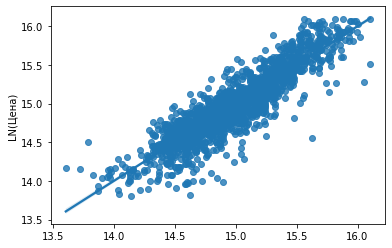

In [514]:
X = sm.add_constant(X_train_std) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

<font size = 3><div style="text-align: justify">**Лучшая модель (Вариант 4):**</div></font>

In [846]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_v2[['LN(Общая площадь)', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_v2['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     626.6
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:46:04   Log-Likelihood:                 357.92
No. Observations:                1811   AIC:                            -691.8
Df Residuals:                    1799   BIC:                            -625.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


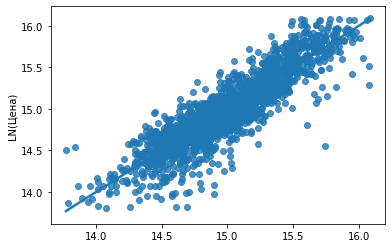

In [847]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

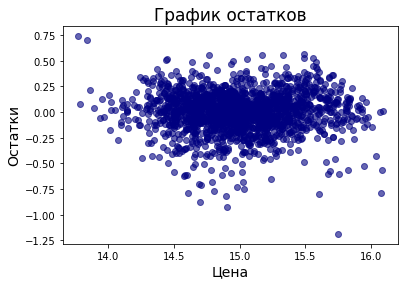

In [848]:
# Строим график остатков обучающей выборки
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Остатки', fontsize=14)
plt.title('График остатков', fontsize=17)
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


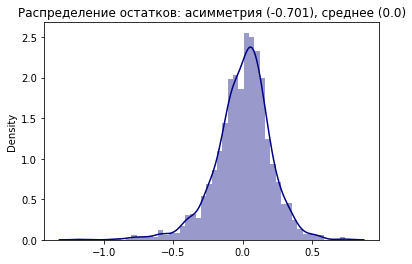

In [849]:
# Строим гистограмму распределения остатков обучающей выборки
resid_mean=round(results.resid.mean(), 3)
resid_skew=round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Распределение остатков: асимметрия ({resid_skew}), среднее ({resid_mean})', fontsize=12)
plt.show()

In [850]:
# Тестирование полученной модели на тестовых данных
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(results.rsquared, 4))

# R2 тестовой выборки
print('Test R^2:', round(model2.score(X_test, Y_test), 4))

Trainig R^2: 0.793
Test R^2: 0.7877


In [851]:
# кросс-валидация
from sklearn.model_selection import cross_val_score

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#model2 = LinearRegression()

cv_results = cross_val_score(model2, X_train, Y_train, cv=5)
cv_results

array([0.80073524, 0.7863655 , 0.78642097, 0.76980996, 0.79816151])

In [852]:
# среднее значение качества модели
cv_results.mean()

0.7882986370677789

In [853]:
Ypred = model2.predict(X_test)

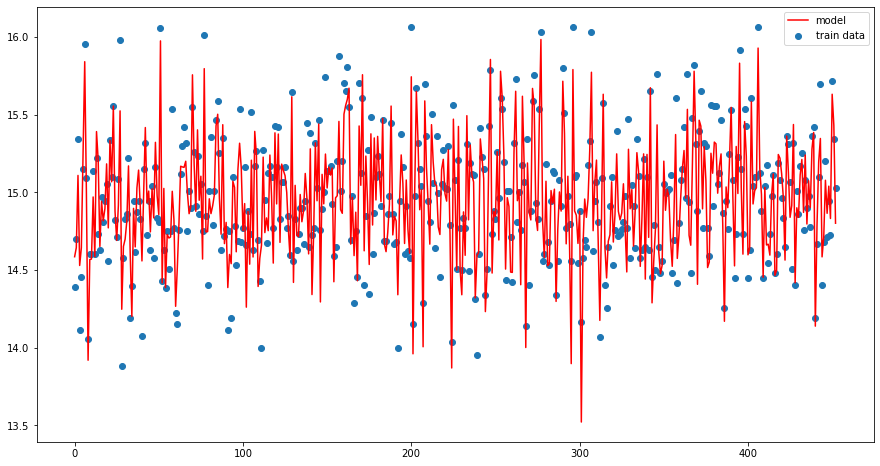

In [854]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), Ypred, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [855]:
# Выведим все полученные коэффициенты
coef=pd.DataFrame({'Коэфф': round(results.params, 4)})
coef

,Коэфф
const,-53.4468
LN(Общая площадь),0.8960
Хронологический возраст,-0.0079
Долгота,0.5764
Широта,0.6296
первый,-0.1095
последний,-0.0474
деревянный,-0.5342
панельный,-0.0741
евро,-0.1361


<font size = 3><div style="text-align: justify">**Работа с выбросами:**</div></font>

In [856]:
#Преобразование данных через метод главной компоненты
from sklearn.decomposition import PCA

dff = df_1[['LN(Общая площадь)', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
            '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
            'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_1 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.15356458]


In [857]:
df_pca_1

array([[ 0.51208329],
       [ 1.10931441],
       [-1.1118266 ],
       ...,
       [ 0.75105984],
       [ 1.81099176],
       [-2.01106043]])

In [858]:
dff = df_1[['Общая площадь', 'Этажей в доме', 'Хронологический возраст', 'Долгота', 'Широта', 
            '1к', '2к', '3к', 'студия', 'первый', 'последний', 'деревянный', 'панельный',
            'евро', 'косметический', 'требует ремонта']]

mms = StandardScaler()
mms.fit(dff)
dff_std = pd.DataFrame(mms.transform(dff), columns = dff.columns)
#dff_std

pca = PCA(n_components = 1)
df_pca_2 = pca.fit_transform(dff_std)

print(pca.explained_variance_ratio_)

[0.15132976]


In [859]:
df_pca_2

array([[ 0.43344271],
       [ 1.44564872],
       [-0.95326849],
       ...,
       [ 0.61069729],
       [ 1.8382958 ],
       [-1.56972245]])

In [860]:
df_1.insert(36, "pca(best_1)", df_pca_1)
df_1.insert(37, "pca(best_2)", df_pca_2)
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,деревянный,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_1),pca(best_2)
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.512083,0.433443
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.109314,1.445649
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.111827,-0.953268
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.396600,0.209087
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.454821,-1.748435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-2.784517,-2.413628
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.761493,-2.029014
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.751060,0.610697
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.810992,1.838296


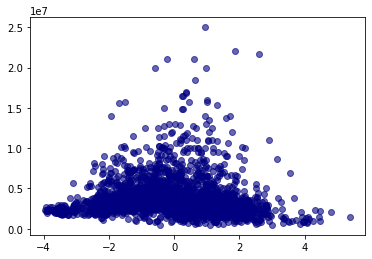

In [861]:
plt.scatter(x=df_1['pca(best_2)'], y=df_1['Цена'], c='navy', alpha=0.6)
plt.show()

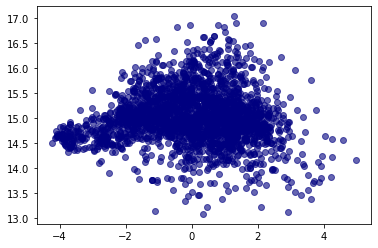

In [862]:
plt.scatter(x=df_1['pca(best_1)'], y=df_1['LN(Цена)'], c='navy', alpha=0.6)
plt.show()

<font size = 2><div style="text-align: justify">**KNN(LN(Цена) и LN(Общая площадь)):**</div></font>

In [863]:
from pyod.models.knn import KNN

In [864]:
X = df_1[['LN(Цена)', 'pca(best_1)']]

#Y = df_1['Цена']
#Y = df_1['LN(Цена)']
#Y = df_1['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [865]:
clf_name = 'KNN'
clf = KNN(contamination = 0.1, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [866]:
Y_train_pred = clf.labels_

In [867]:
Y_train_scores = clf.decision_scores_

In [868]:
Y_train_scores

array([0.06035658, 0.04454141, 0.07640271, ..., 0.05144232, 0.09270276,
       0.11873809])

In [869]:
v = Y_train_pred

In [870]:
v.sum()

240

In [871]:
X.insert(2, "выбросы_метки", v)
X

,LN(Цена),pca(best_1),выбросы_метки
0,14.862830,0.512083,0
1,14.557448,1.109314,0
2,14.897316,-1.111827,0
3,15.308415,0.396600,0
4,15.498199,-1.454821,0
...,...,...,...
2394,14.578417,-2.784517,0
2395,15.221203,-1.761493,0
2396,15.114071,0.751060,0
2397,14.580978,1.810992,0


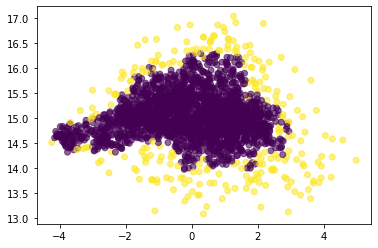

In [872]:
plt.scatter(x=X['pca(best_1)'], y=X['LN(Цена)'], c=X['выбросы_метки'], alpha=0.6)
plt.show()

<font size = 2><div style="text-align: justify">**KNN(Цена и Общая площадь):**</div></font>

In [543]:
X = df_1[['Цена', 'pca(best_2)']]

clf_name = 'KNN'
clf = KNN(contamination = 0.1, n_neighbors = 5) #contamination - доля аномалий
clf.fit(X)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [544]:
Y_train_pred = clf.labels_
v = Y_train_pred

In [545]:
v.sum()

239

In [546]:
X.insert(2, "выбросы_метки", v)
X

,Цена,pca(best_2),выбросы_метки
0,2850000,0.433420,0
1,2100000,1.445698,0
2,2950000,-0.953327,0
3,4450000,0.209127,0
4,5380000,-1.748441,0
...,...,...,...
2394,2144500,-2.413621,0
2395,4078350,-2.029019,0
2396,3664020,0.610609,0
2397,2150000,1.838337,0


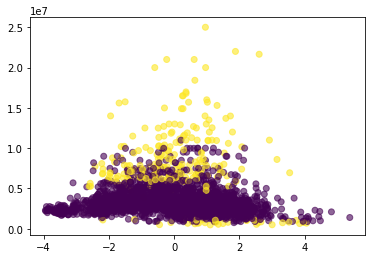

In [547]:
plt.scatter(x=X['pca(best_2)'], y=X['Цена'], c=X['выбросы_метки'], alpha=0.6)
plt.show()

In [875]:
df_1['выбросы_метки'] = v
df_1

,Комнатность,LN(Общая площадь),Общая площадь,Площадь кухни,Жилая площадь,Этаж 1,Этаж 2,Этажей в доме,Ремонт,Материал стен,...,кирпичный,монолитный,панельный,дизайнерский,евро,косметический,требует ремонта,pca(best_1),pca(best_2),выбросы_метки
0,2к,3.799974,44.7,5.900000,29.458690,5,последний,5,евро,панельный,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.512083,0.433443,0
1,1к,3.465736,32.0,6.900000,17.655975,2,средний,5,косметический,кирпичный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.109314,1.445649,0
2,студия,3.502550,33.2,6.633333,18.193506,3,последний,3,евро,кирпичный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.111827,-0.953268,0
3,2к,3.943522,51.6,8.800000,28.744021,6,средний,7,евро,кирпичный,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.396600,0.209087,0
4,3к,3.998201,54.5,18.000000,27.597229,18,средний,19,дизайнерский,панельный,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-1.454821,-1.748435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,студия,3.238678,25.5,5.766667,15.794119,5,средний,17,косметический,панельный,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-2.784517,-2.413628,0
2395,2к,3.937691,51.3,10.900000,27.975283,15,средний,17,требует ремонта,панельный,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.761493,-2.029014,0
2396,2к,3.837299,46.4,8.300000,27.588898,1,первый,4,требует ремонта,кирпичный,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.751060,0.610697,0
2397,2к,3.784190,44.0,6.000000,28.860337,4,средний,5,косметический,кирпичный,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.810992,1.838296,0


In [876]:
df_i = df_1.copy()

In [877]:
df_i = df_i.loc[df_i['выбросы_метки'] == 0]
len(df_i)

2159

In [878]:
# Присваиваем зависимую переменную (цена) Y, а независимые переменные - X
# df_v1 и df_v2
X = df_i[['LN(Общая площадь)', 'Хронологический возраст', 
          'Долгота', 'Широта', 'первый', 'последний', 'деревянный', 'панельный',
           'евро', 'косметический', 'требует ремонта']]

#'студия', 'средний', 'монолитный', 'дизайнерский', 'LN(Общая площадь)'

#Y = df_v2['Цена']
Y = df_i['LN(Цена)']
#Y = df_v2['Цена(кв.м)']

# Делим имеющуюся выборку на обучающую и тестовую
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

                            OLS Regression Results                            
Dep. Variable:               LN(Цена)   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     636.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:47:27   Log-Likelihood:                 453.45
No. Observations:                1727   AIC:                            -882.9
Df Residuals:                    1715   BIC:                            -817.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


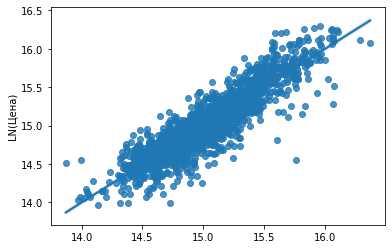

In [879]:
X = sm.add_constant(X_train) # добавляем константу = 1 к факторам

# Строим регрессионную модель
model = sm.OLS(Y_train, X)
results = model.fit()
print(results.summary())
#r = results.predict(X)
#r = np.array(results)

# Строим график
sns.regplot(results.fittedvalues.copy(), Y_train)
plt.show()

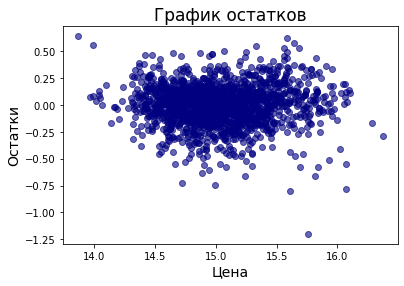

In [880]:
# Строим график остатков обучающей выборки
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Цена', fontsize=14)
plt.ylabel('Остатки', fontsize=14)
plt.title('График остатков', fontsize=17)
plt.show()

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


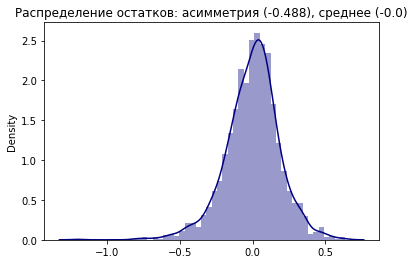

In [881]:
# Строим гистограмму распределения остатков обучающей выборки
resid_mean=round(results.resid.mean(), 3)
resid_skew=round(results.resid.skew(), 3)

sns.distplot(results.resid, color='navy')
plt.title(f'Распределение остатков: асимметрия ({resid_skew}), среднее ({resid_mean})', fontsize=12)
plt.show()

In [882]:
# Тестирование полученной модели на тестовых данных
model2 = LinearRegression()
model2.fit(X_train, Y_train)

# R2 обучающей выборки
print('Trainig R^2:', round(results.rsquared, 4))

# R2 тестовой выборки
print('Test R^2:', round(model2.score(X_test, Y_test), 4))

Trainig R^2: 0.8033
Test R^2: 0.8401


In [883]:
# кросс-валидация
from sklearn.model_selection import cross_val_score

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#model2 = LinearRegression()

cv_results = cross_val_score(model2, X_train, Y_train, cv=5)
cv_results

array([0.82630855, 0.78280578, 0.81189673, 0.79260068, 0.7795661 ])

In [884]:
# среднее значение качества модели
cv_results.mean()

0.7986355662653036

In [885]:
Ypred = model2.predict(X_test)

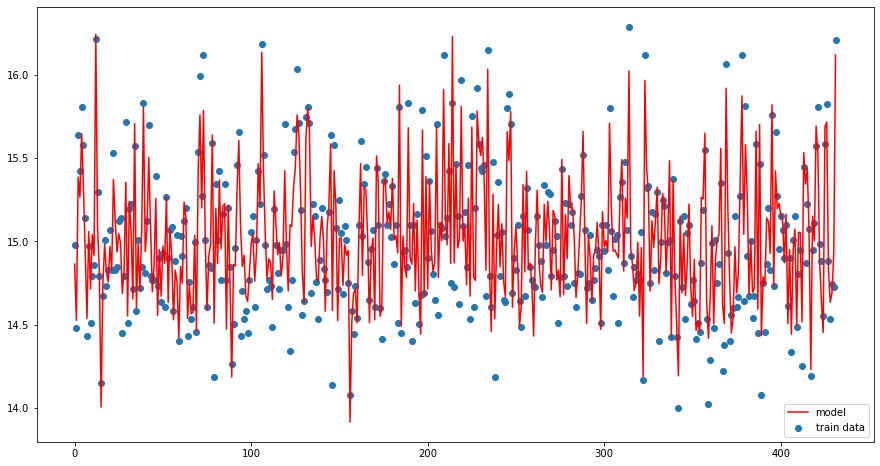

In [886]:
plt.figure(figsize=(15, 8))
plt.plot(range(len(Y_test)), Ypred, c='r', label='model');
plt.scatter(range(len(Y_test)), Y_test, label='train data')
plt.legend();

In [887]:
pred_train = model2.predict(X_train)

In [888]:
from sklearn.metrics import mean_absolute_error as mae
print("MAE на обучении:", round(mae(Y_train, pred_train), 5))
print("MAE на тесте:", round(mae(Y_test, Ypred), 5))

MAE на обучении: 0.13974
MAE на тесте: 0.13308


In [889]:
import math
math.exp(0.1447)

1.15569281041352

In [890]:
# Выведим все полученные коэффициенты
coef=pd.DataFrame({'Коэфф': round(results.params, 4)})
coef

,Коэфф
const,-50.0209
LN(Общая площадь),0.8827
Хронологический возраст,-0.0076
Долгота,0.5303
Широта,0.6110
первый,-0.0465
последний,-0.0336
деревянный,-0.6382
панельный,-0.0901
евро,-0.1324


где:
1. LN(S) - логарифм площади квартиры.
2. Тхр - хронологический возраст дома.
3. Д - долгота (местоположение).
4. Ш - широта (местоположение).
5. Э1 - первый этаж.
6. ЭП - последний этаж.
7. Дер - материал стен - дерево.
8. Пан - материал стен - панель.
9. ЕВ - состояние отделки - евроремонт.
10. Кос - состояние отделки - косметический (не требует ремонта).
11. ТР - состояние отделки - требует ремонта.

Также учтено в модели:
Средний этаж - квартиры, расположенные на средних этажах.
Дизайнерский ремонт - ремонт из дорогих материалов со сложными решениями.
Кирпич и монолит - материал стен (объединены в одну группу).

В целом модель получилась адекватной, существенное влияние мультиколлинеарности на коэффициенты при независимых переменных - отсутствует. Остатки распределены ненормально, о чем говорит острая вершина гистограммы и ее хвосты, но гистограмма имеет колоколообразную форму, что приближает ее к нормальному распределению. Метрика R2 (в соответствии с кросс-валидацией) составляет 80%.